# Testing Multiple classifiers.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn import feature_selection
import warnings
warnings.filterwarnings('ignore')
import graphviz
import pydotplus
import time
import pickle
from IPython.display import display

In [2]:
# preprocessed training dataset
df_test = pd.read_csv('df_test_30_11.csv')

In [3]:
df_test.shape

(4856, 39)

In [4]:
#preprocessed test dataset
df_train=pd.read_csv('df_train_30_11.csv')

In [5]:
df_train.shape

(24286, 39)

In [6]:
#combining both train and test preprocessed dataset
df_ri=pd.concat([df_train,df_test])

In [7]:
df_ri.head(2)

,Sentiment,Country,Account.Type,Engagement.Score,Gender,Impact,Impressions,Kred.Influence,Kred.Outreach,Reach,...,links_twitter,links_youtube,links_facebook,links_instagram,links_other,word_sex,word_good,word_woman,word_new,word_like
0,neutral,United Kingdom,individual,0.000000,unknown,50,147,744,7,744,...,False,False,False,False,False,False,False,False,False,False
1,negative,United Kingdom,individual,1.033732,male,63,16005,876,9,9959,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df_ri.shape

(29142, 39)

Class 0: 14571
Class 1: 14571
Proportion: 1.0 : 1


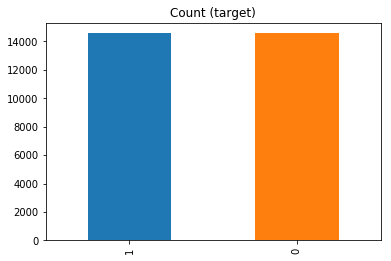

In [9]:
# checking for class imbalance
target_count = df_ri.spam.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [10]:
labelencoder = LabelEncoder()

In [11]:
# label encoding the following :Sentiment Country Account.Type Gender Thread.Entry.Type Twitter.Verified name_2_w
# links_twitter links_youtube links_facebook links_instagram links_other word_sex
#word_good word_woman word_new word_like

In [12]:
df_ri['Sentiment'] = labelencoder.fit_transform(df_ri['Sentiment'])

In [13]:
df_ri['Country'] = labelencoder.fit_transform(df_ri['Country'])

In [14]:
df_ri['Account.Type'] = labelencoder.fit_transform(df_ri['Account.Type'])

In [15]:
df_ri['Gender'] = labelencoder.fit_transform(df_ri['Gender'])

In [16]:
df_ri['Thread.Entry.Type'] = labelencoder.fit_transform(df_ri['Thread.Entry.Type'])

In [17]:
df_ri['Twitter.Verified'] = labelencoder.fit_transform(df_ri['Twitter.Verified'])

In [18]:
df_ri['name_2_w'] = labelencoder.fit_transform(df_ri['name_2_w'])

In [19]:
df_ri['links_twitter'] = labelencoder.fit_transform(df_ri['links_twitter'])

In [20]:
df_ri['links_youtube'] = labelencoder.fit_transform(df_ri['links_youtube'])

In [21]:
df_ri['links_facebook'] = labelencoder.fit_transform(df_ri['links_facebook'])

In [22]:
df_ri['links_instagram'] = labelencoder.fit_transform(df_ri['links_instagram'])

In [23]:
df_ri['links_other'] = labelencoder.fit_transform(df_ri['links_other'])

In [24]:
df_ri['word_sex'] = labelencoder.fit_transform(df_ri['word_sex'])

In [25]:
df_ri['word_good'] = labelencoder.fit_transform(df_ri['word_good'])

In [26]:
df_ri['word_woman'] = labelencoder.fit_transform(df_ri['word_woman'])

In [27]:
df_ri['word_new'] = labelencoder.fit_transform(df_ri['word_new'])

In [28]:
df_ri['word_like'] = labelencoder.fit_transform(df_ri['word_like'])

In [29]:
df_ri.head(2)

,Sentiment,Country,Account.Type,Engagement.Score,Gender,Impact,Impressions,Kred.Influence,Kred.Outreach,Reach,...,links_twitter,links_youtube,links_facebook,links_instagram,links_other,word_sex,word_good,word_woman,word_new,word_like
0,1,125,0,0.000000,2,50,147,744,7,744,...,0,0,0,0,0,0,0,0,0,0
1,0,125,0,1.033732,1,63,16005,876,9,9959,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_ri=df_ri.drop(['id'],axis=1)
df_ri.shape

(29142, 38)

In [32]:
# attribute and target selection
x=df_ri.drop(['spam'],axis=1)
X=x.values
Y=df_ri['spam']
X.shape



(29142, 37)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=21)

In [34]:
# dictionary of classifiers
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}

In [35]:
# running all the classifiers in the list specified in dict_clasifiers above.

for classifier_name, classifier in list(dict_classifiers.items()): # for loop through all the algorithms in the list
   
    time_start = time.clock() #  start time for training
    
    classifier.fit(X_train, Y_train) # fitting the model on the training set of explanatory and target variables
    
    time_end = time.clock()   # end time of the training.
    
    time_diff = time_end - time_start # time taken substact start and end time.
    
    train_score = classifier.score(X_train, Y_train) #accuracy of training and testing
    test_score = classifier.score(X_test, Y_test)
    
    print(" Results:{a}\n Accuracy Score in Training: {b:.3f}\n Accuracy Score in Testing: {c:.3f}\n Timetaken to Train: {d:.3f}". format(a=classifier_name, b=train_score, c=test_score,d=time_diff))
    print(" Trained {c} in {f:.2f} s \n".format(c=classifier_name, f=time_diff))

 Results:Logistic Regression
 Accuracy Score in Training: 0.683
 Accuracy Score in Testing: 0.684
 Timetaken to Train: 1.013
 Trained Logistic Regression in 1.01 s 

 Results:Nearest Neighbors
 Accuracy Score in Training: 0.748
 Accuracy Score in Testing: 0.630
 Timetaken to Train: 0.069
 Trained Nearest Neighbors in 0.07 s 

 Results:Linear SVM
 Accuracy Score in Training: 0.997
 Accuracy Score in Testing: 0.543
 Timetaken to Train: 88.416
 Trained Linear SVM in 88.42 s 

 Results:Gradient Boosting Classifier
 Accuracy Score in Training: 0.803
 Accuracy Score in Testing: 0.732
 Timetaken to Train: 35.513
 Trained Gradient Boosting Classifier in 35.51 s 

 Results:Decision Tree
 Accuracy Score in Training: 1.000
 Accuracy Score in Testing: 0.664
 Timetaken to Train: 0.276
 Trained Decision Tree in 0.28 s 

 Results:Random Forest
 Accuracy Score in Training: 1.000
 Accuracy Score in Testing: 0.750
 Timetaken to Train: 41.258
 Trained Random Forest in 41.26 s 

 Results:Neural Net
 Accur

In [36]:
# function for get the scores
def print_score(classifier,X_train,Y_train,X_test,Y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(Y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(Y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_train,classifier.predict(X_train))))
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(Y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(Y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,classifier.predict(X_test))))

In [37]:
#dtc=DecisionTreeClassifier(random_state=21)
#dtc.fit(X_train,Y_train)
#Y_pred=dtc.predict(X_test)

In [38]:
#GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
Y_pred=gbc.predict(X_test)

In [39]:
#dot_data = export_graphviz(dtc, out_file=None, 
                         #feature_names=x.columns,  
                         #filled=True, rounded=True,  
                         #special_characters=True)  
#graph = graphviz.Source(dot_data)  
#graph 
#graph.render("realtive")



In [40]:
print_score(gbc,X_train,Y_train,X_test,Y_test,train=True)

Training results:

Accuracy Score: 0.7372

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10177
           1       0.77      0.67      0.72     10222

   micro avg       0.74      0.74      0.74     20399
   macro avg       0.74      0.74      0.74     20399
weighted avg       0.74      0.74      0.74     20399


Confusion Matrix:
[[8141 2036]
 [3325 6897]]

Average Accuracy:	0.7231

Standard Deviation:	0.0073


In [41]:
print_score(gbc,X_train,Y_train,X_test,Y_test,train=False)

Test results:

Accuracy Score: 0.7263

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      4394
           1       0.76      0.66      0.71      4349

   micro avg       0.73      0.73      0.73      8743
   macro avg       0.73      0.73      0.72      8743
weighted avg       0.73      0.73      0.73      8743


Confusion Matrix:
[[3480  914]
 [1479 2870]]



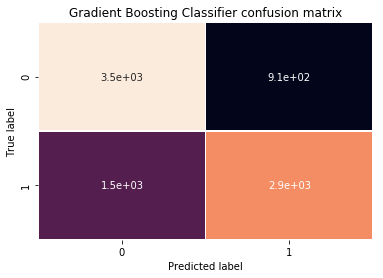

In [42]:
cfm=confusion_matrix(Y_test, Y_pred)

sns.heatmap(cfm, annot =True,  linewidths=.5, cbar =None)
plt.title('Gradient Boosting Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

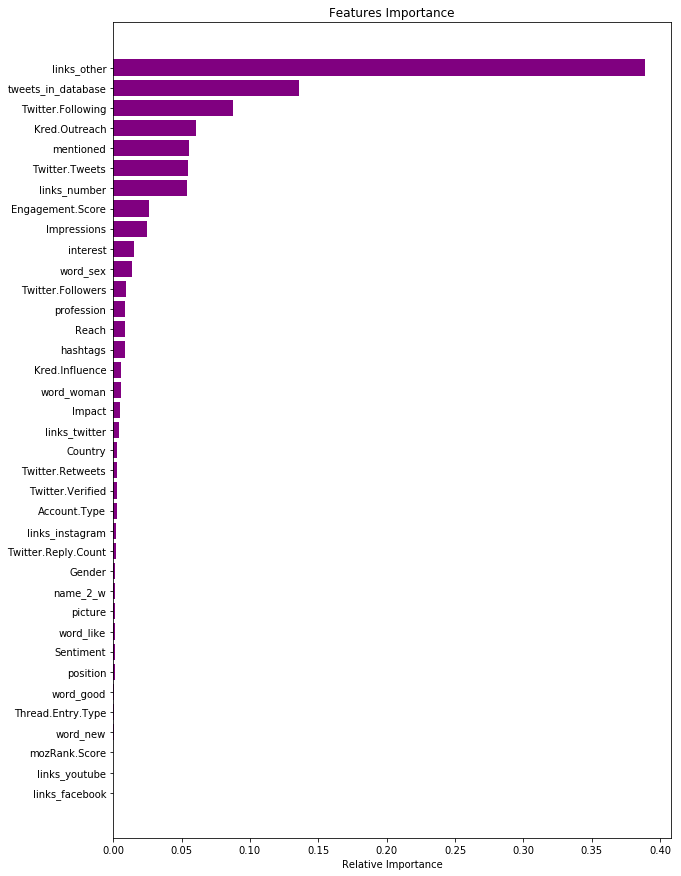

In [43]:
# feature importance
fig, ax=plt.subplots(figsize=(10,15))
features = x.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

(0, 40)

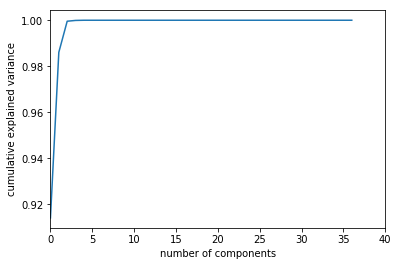

In [44]:
# principal component analysis
pca=PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,40,0.5)

In [45]:
pca=PCA(n_components=5)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_train_pca.shape

(20399, 5)

In [46]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_pca, Y_train)
Y_pred=gbc.predict(X_test_pca)




In [47]:
print_score(gbc,X_train_pca,Y_train,X_test_pca,Y_test,train=True)

Training results:

Accuracy Score: 0.6752

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.74      0.70     10177
           1       0.70      0.61      0.65     10222

   micro avg       0.68      0.68      0.68     20399
   macro avg       0.68      0.68      0.67     20399
weighted avg       0.68      0.68      0.67     20399


Confusion Matrix:
[[7580 2597]
 [4028 6194]]

Average Accuracy:	0.6608

Standard Deviation:	0.0064


In [48]:
print_score(gbc,X_train_pca,Y_train,X_test_pca,Y_test,train=False)

Test results:

Accuracy Score: 0.6533

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      4394
           1       0.68      0.58      0.63      4349

   micro avg       0.65      0.65      0.65      8743
   macro avg       0.66      0.65      0.65      8743
weighted avg       0.66      0.65      0.65      8743


Confusion Matrix:
[[3181 1213]
 [1818 2531]]



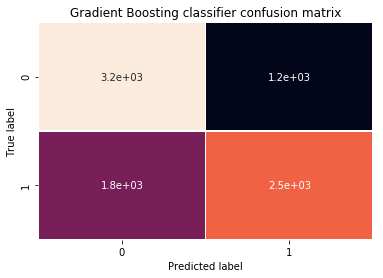

In [49]:
cfm=confusion_matrix(Y_test, Y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gradient Boosting classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

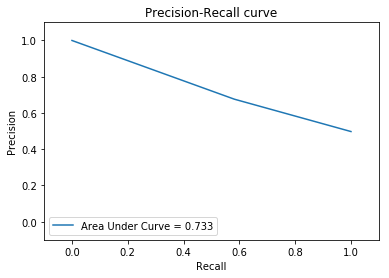

In [50]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

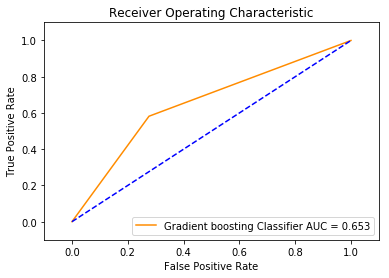

In [51]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, Y_pred, "Gradient boosting Classifier")

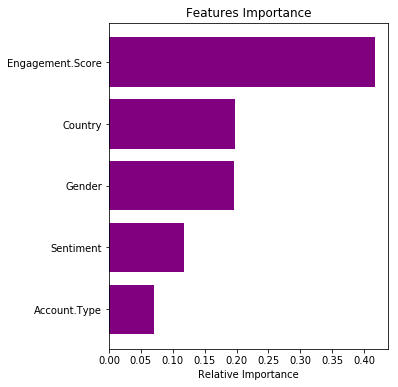

In [52]:
fig, ax=plt.subplots(figsize=(5,6))
features = x.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 